In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import networkx as nx

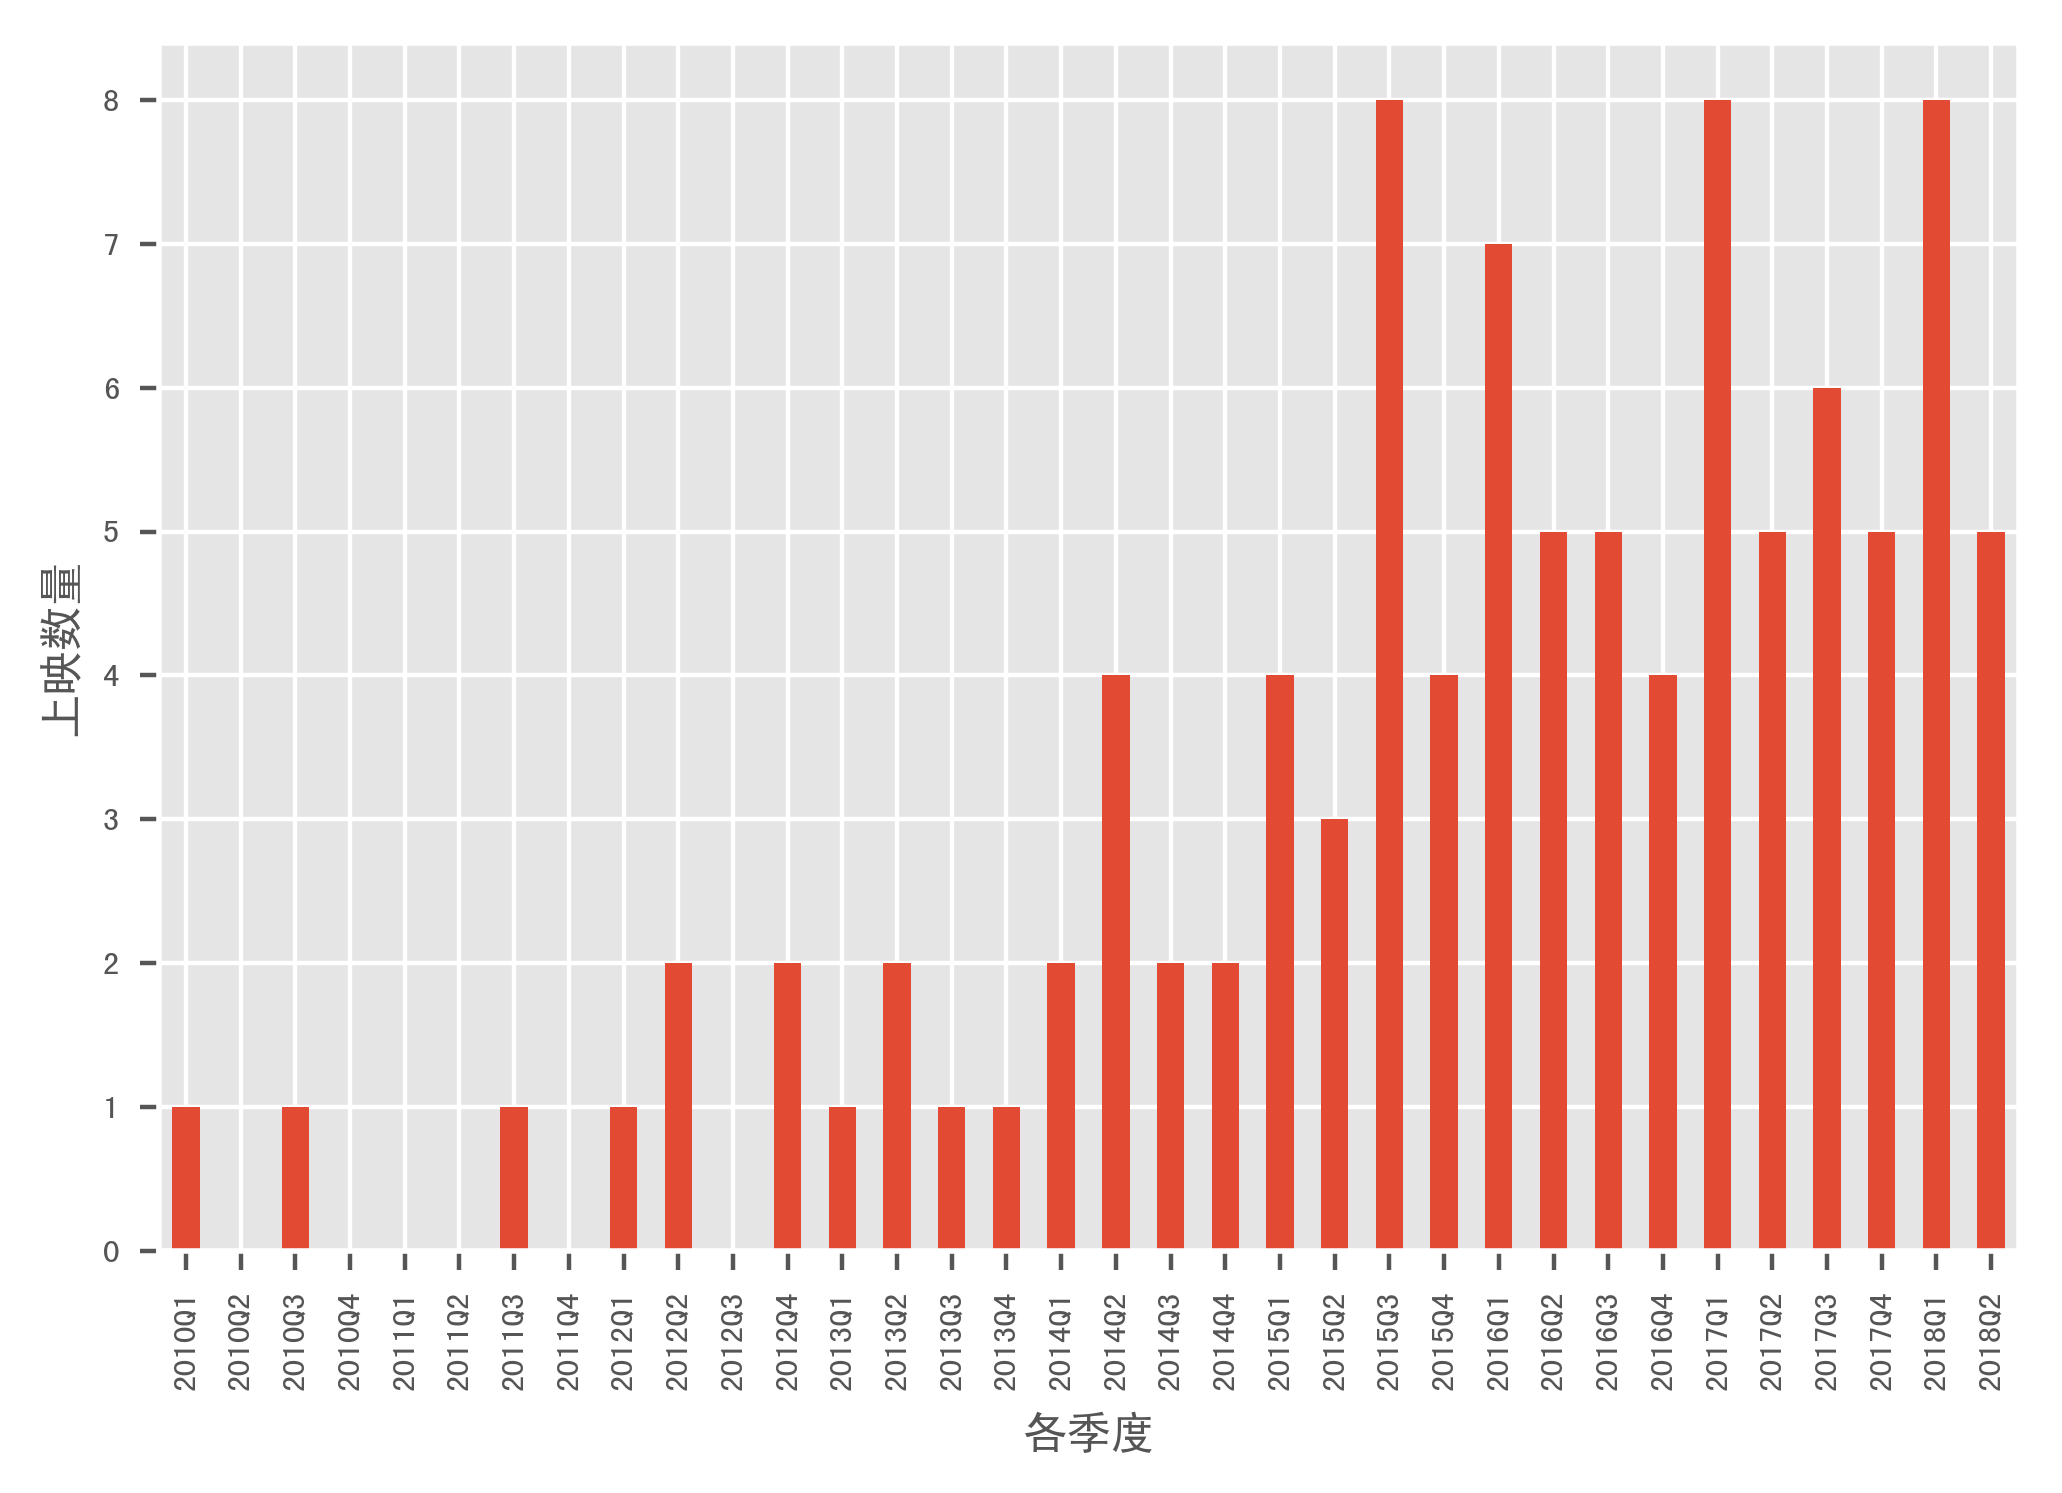

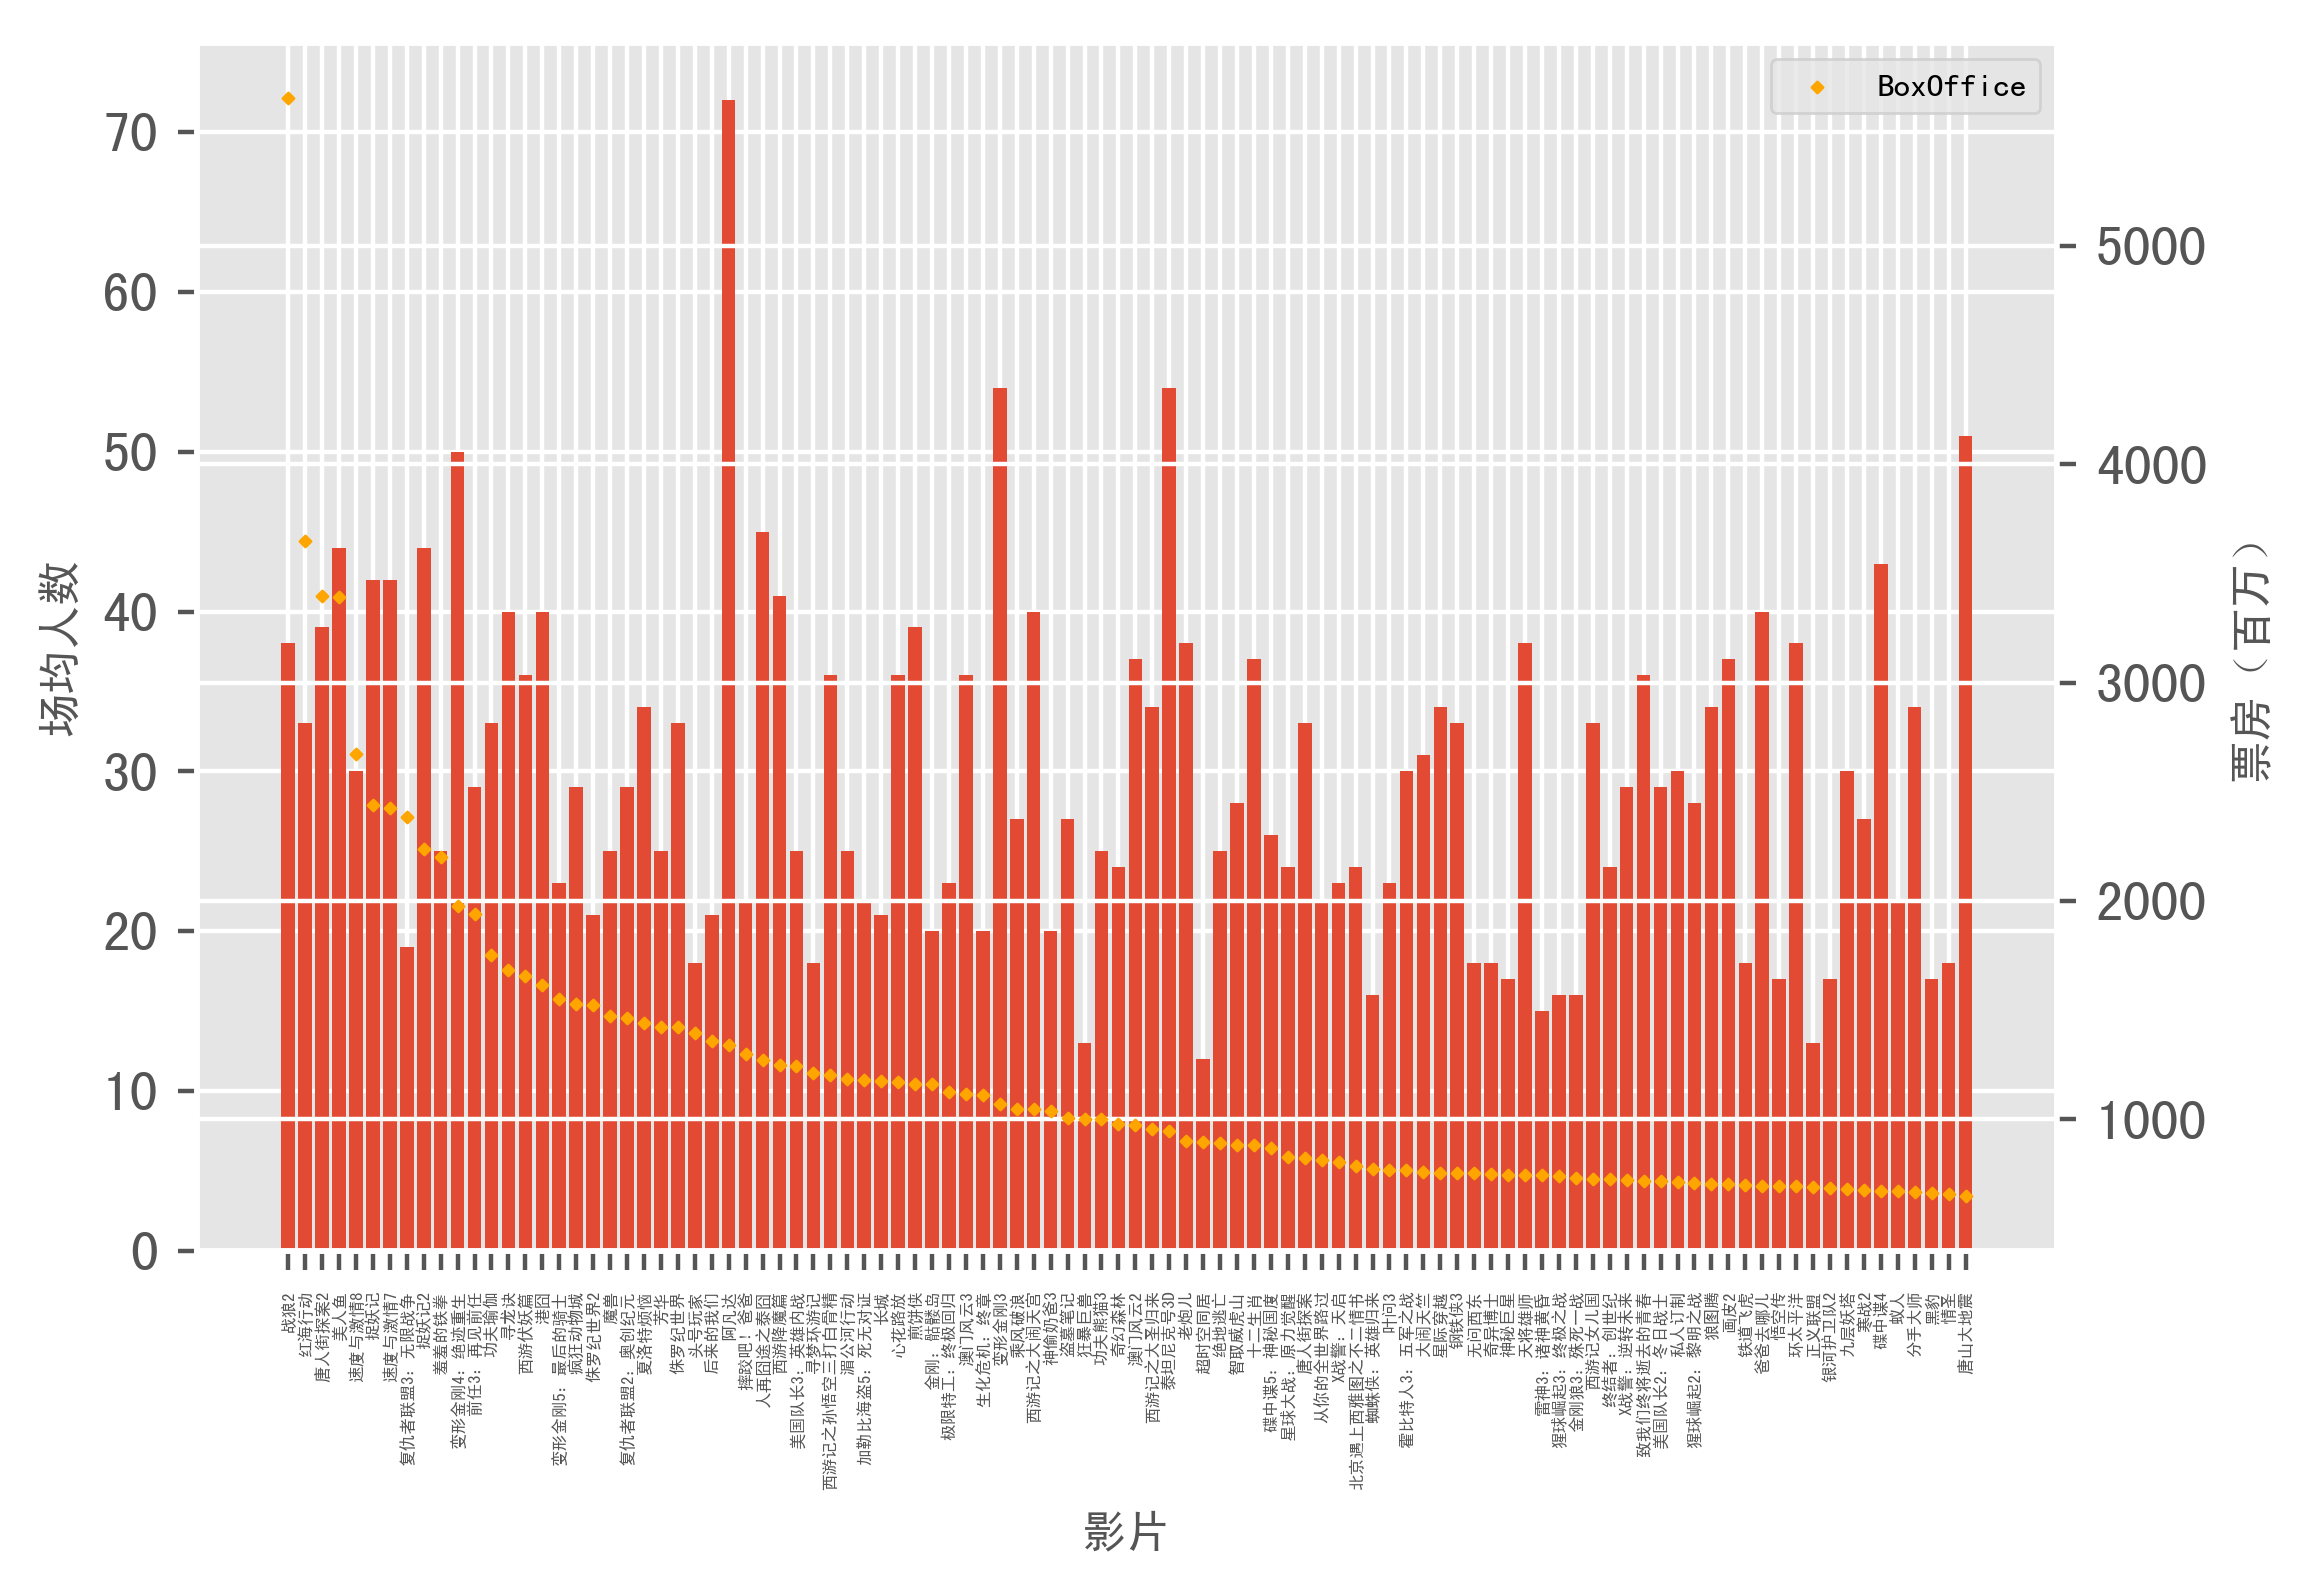

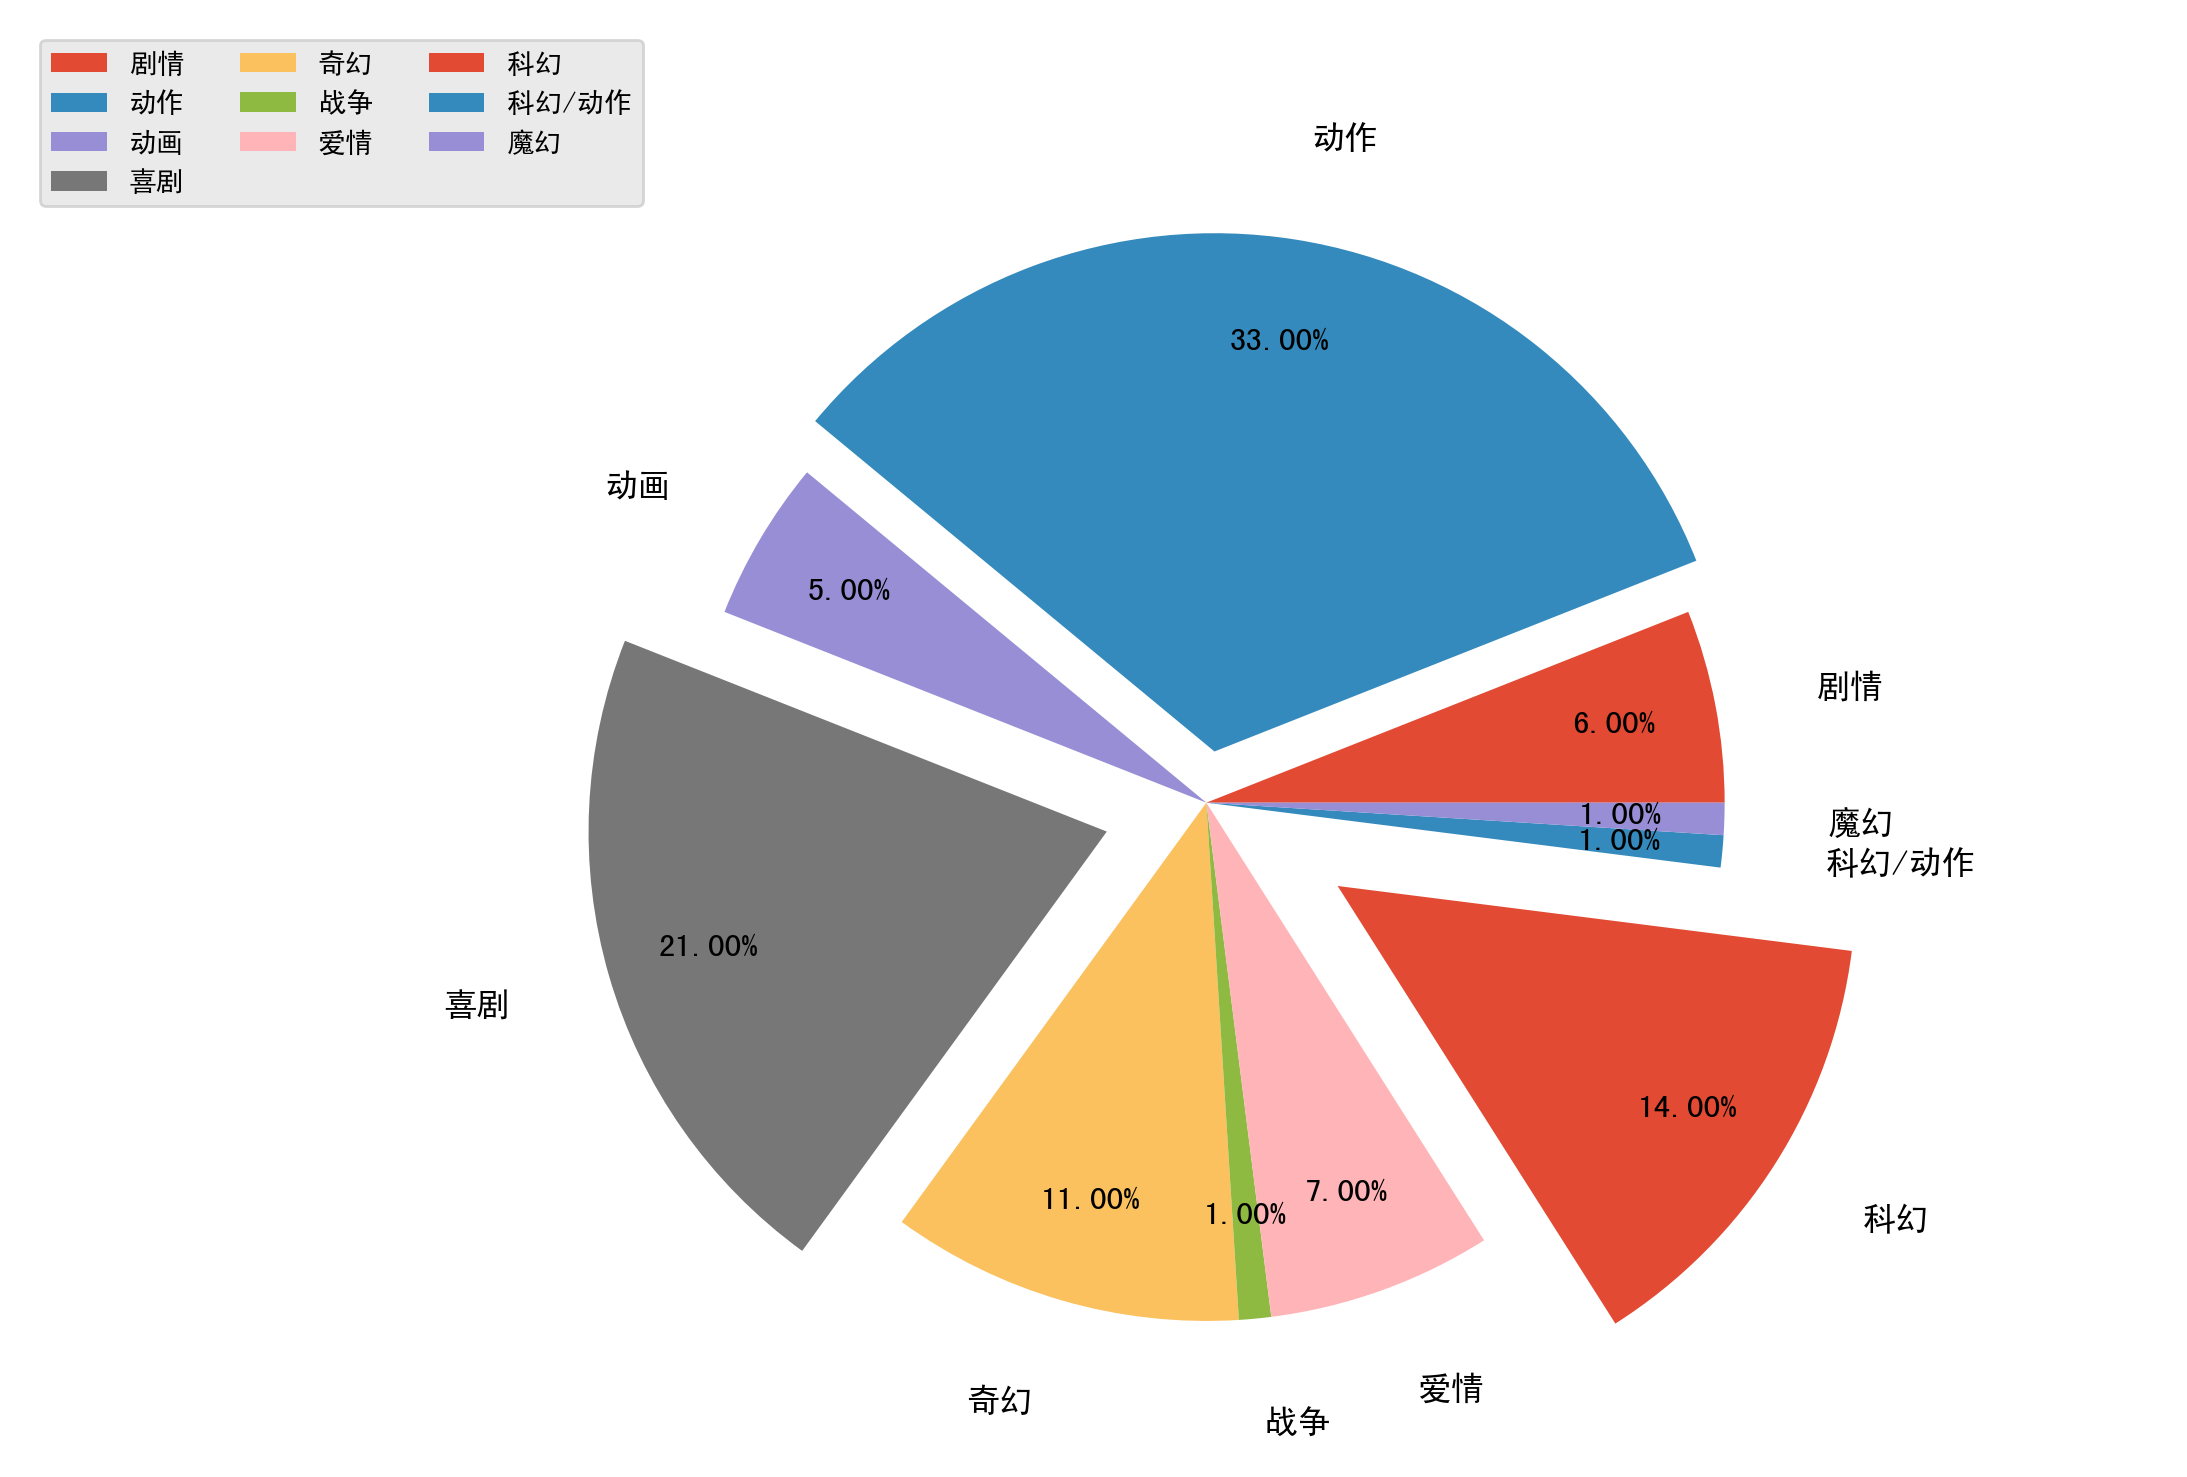

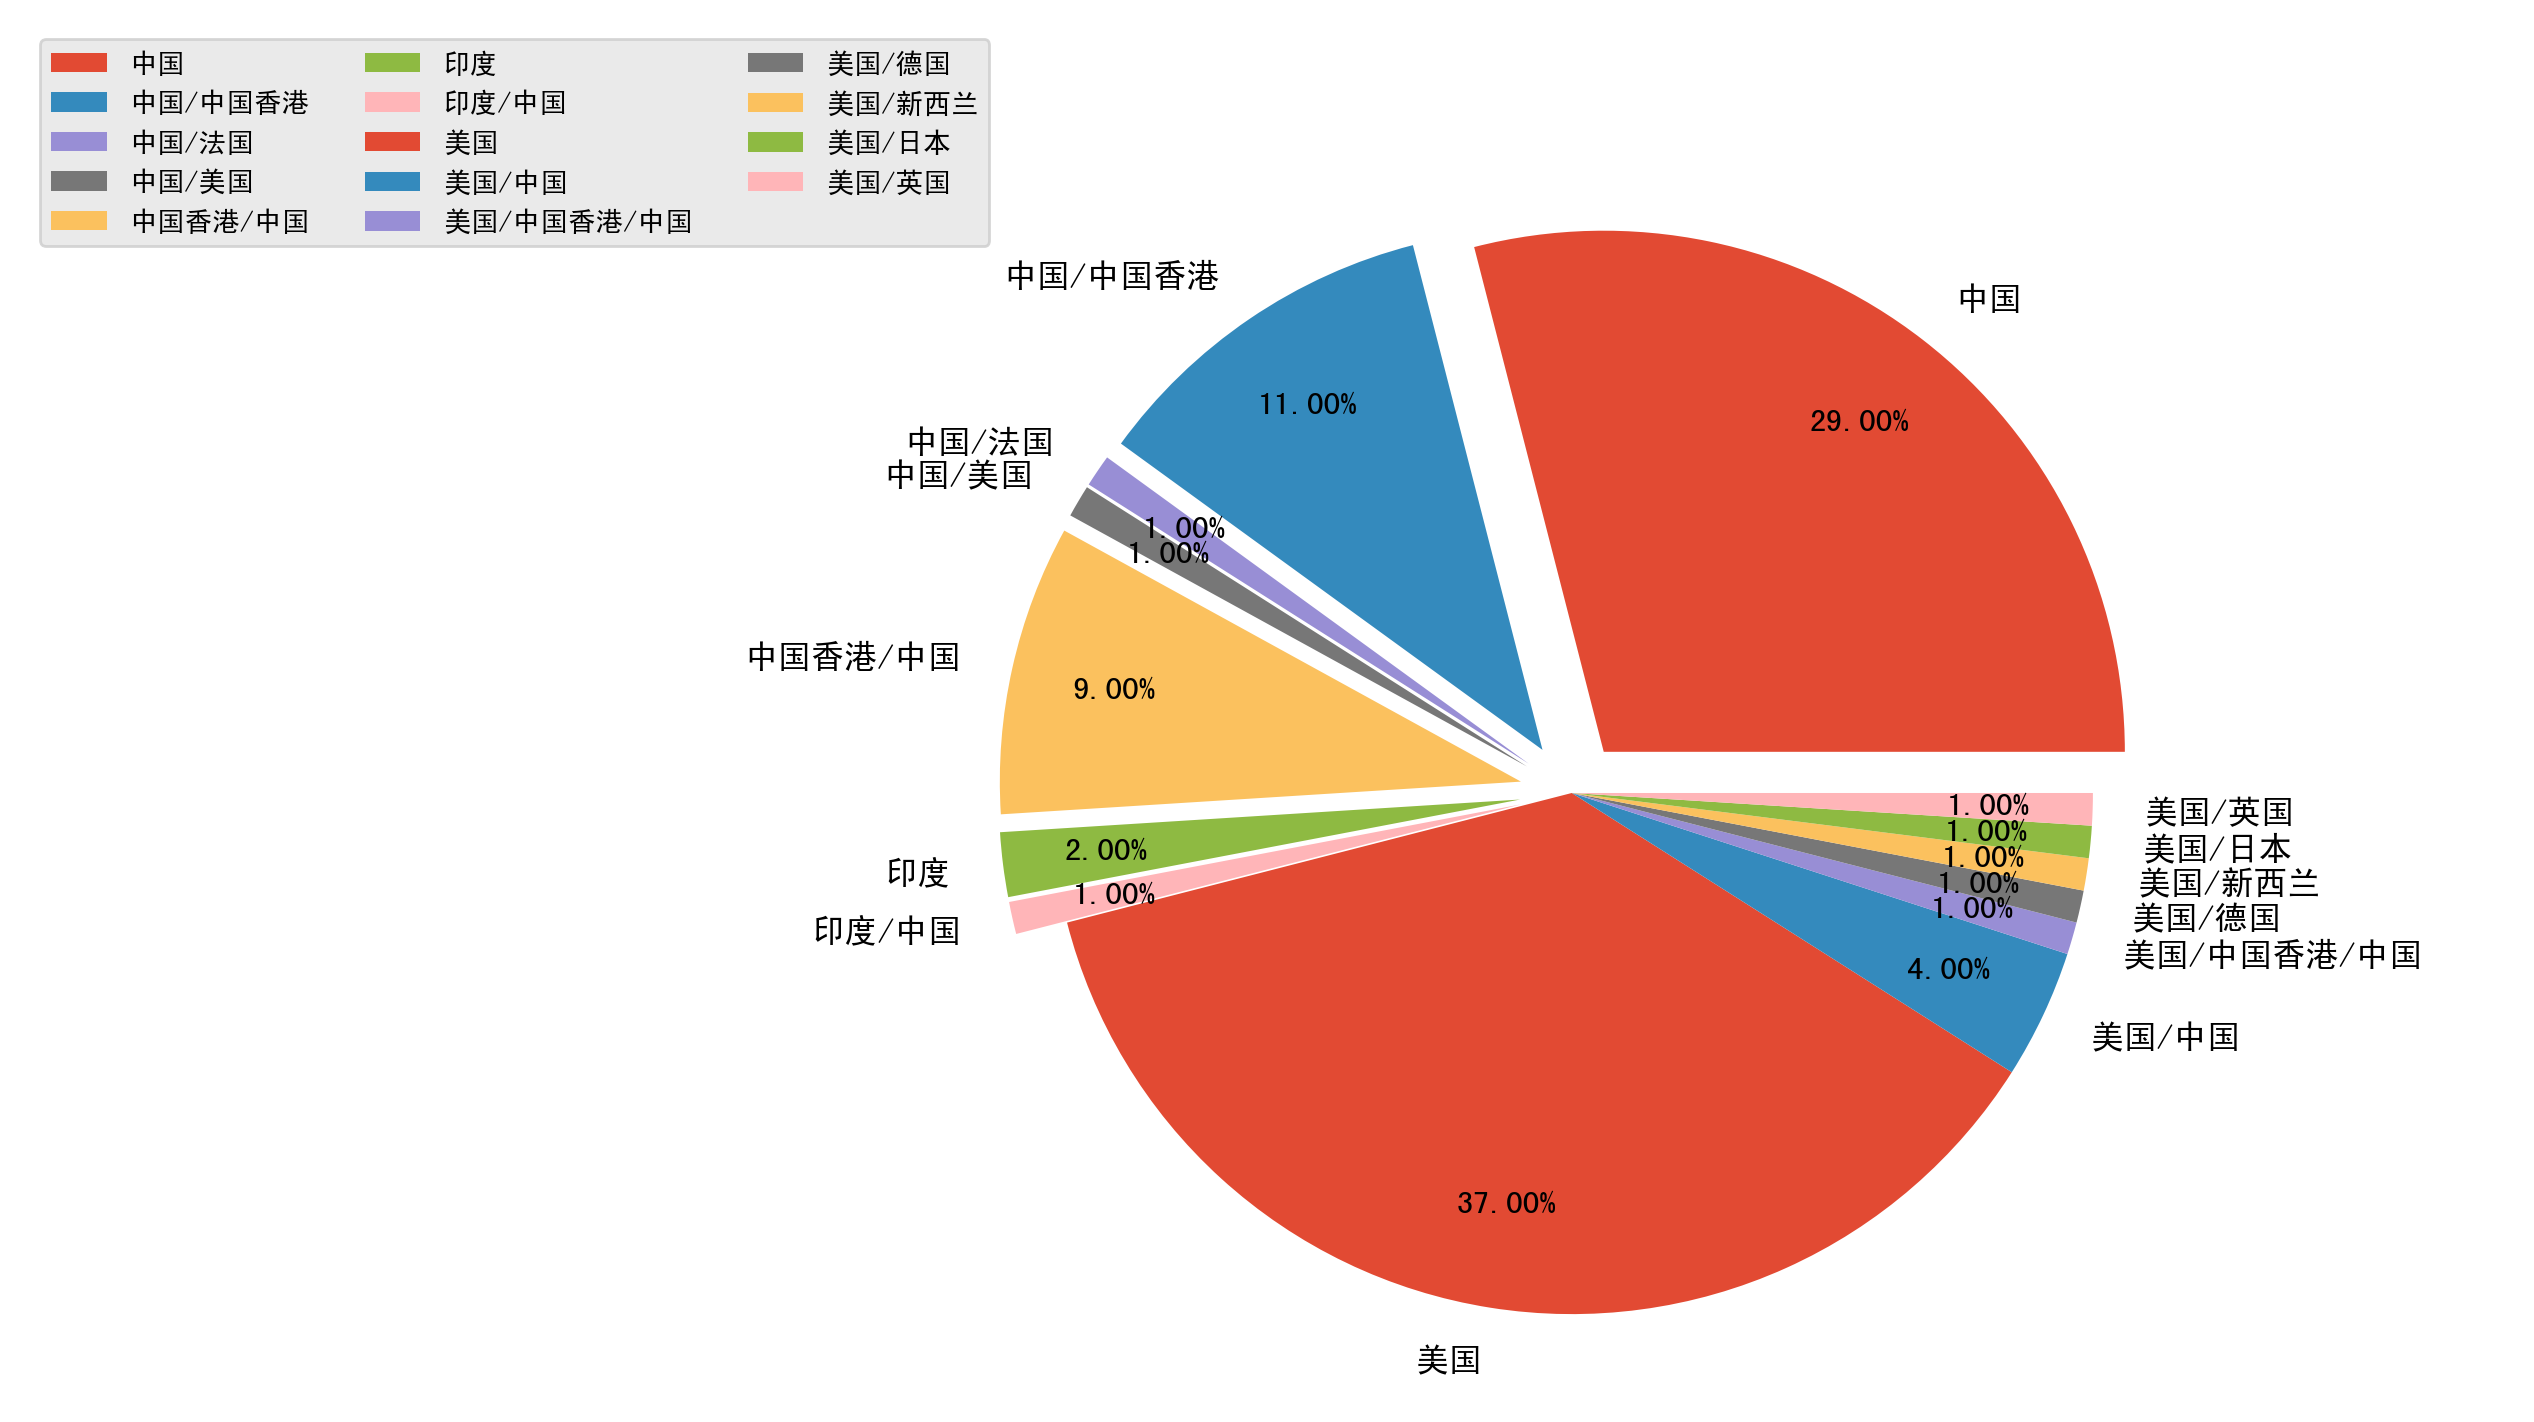

In [85]:
plt.style.use('ggplot')
dpi=200

dateparse = lambda dates: pd.datetime.strptime(
    dates, '%Y-%m-%d'
)
d1=pd.read_csv('movie_Boxoffice.csv',parse_dates=['ReleaseTime'],date_parser=dateparse)
d1 = d1.set_index('ReleaseTime').iloc[:,1:]
# d1.BoxOffice.apply(lambda x: x/100)
d2=pd.read_csv('movie_person.csv')

f1=plt.figure(dpi=dpi)
d1.resample('Q').count().to_period('Q').MovieID.plot(kind='bar',fontsize=6)
plt.xlabel('各季度',fontsize=8)
plt.ylabel('上映数量',fontsize=8)

f2=plt.figure(dpi=dpi)
ax1=plt.gca()
dd2=d1.loc[:,['MovieName','AvgPeople','BoxOffice']].sort_values(by='BoxOffice',ascending=False).reset_index(drop=True)
ax1.bar(range(len(dd2.MovieName)),dd2.AvgPeople,tick_label=dd2.MovieName)
plt.xticks(rotation=90,fontsize=3)
ax1.set_ylabel('场均人数',fontsize=8)
ax1.set_xlabel('影片',fontsize=8)

ax2=ax1.twinx()
ax2.scatter(range(len(dd2.MovieName)),dd2.BoxOffice/100,marker='D',s=2,c='orange')
ax2.set_ylabel('票房（百万）',fontsize=8)
f2.legend(loc=1,fontsize=6,bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

f3=plt.figure(dpi=dpi)
explode=np.zeros(10)
explode[1]=0.1
explode[3]=0.2
explode[7]=0.3
dd3=d1.groupby('Genre_Main').count().plot.pie(y='MovieName',ax=plt.gca(),autopct="%1.2f%%",pctdistance=0.8,
                                              labeldistance=1.2,fontsize=6,explode=explode)
plt.gca().legend(loc='best', bbox_to_anchor=(0.2, 1.12),ncol=3,fontsize=5)
plt.ylabel('')
plt.axis('equal')

plt.figure(dpi=dpi)
explode=np.zeros(14)
explode[:7]=0.1
dd4=d1.groupby('Area').count().plot.pie(y='MovieName',ax=plt.gca(),autopct="%1.2f%%",pctdistance=0.8,
                                              labeldistance=1.1,fontsize=6,explode=explode)
plt.gca().legend(loc='best', bbox_to_anchor=(0.2, 1.12),ncol=3,fontsize=5)
plt.ylabel('')
plt.axis('equal')

plt.show()

In [24]:
type(d1.ReleaseTime[0])

pandas._libs.tslib.Timestamp

In [15]:
d1.ReleaseTime.apply(lambda x: parse(x))

0    2017-07-27
1    2018-02-16
2    2018-02-16
3    2016-02-08
4    2017-04-14
5    2015-07-16
6    2015-04-12
7    2018-05-11
8    2018-02-16
9    2017-09-30
10   2014-06-27
11   2017-12-29
12   2017-01-28
13   2015-12-18
14   2017-01-28
15   2015-09-25
16   2017-06-23
17   2016-03-04
18   2018-06-15
19   2016-06-08
20   2015-05-12
21   2015-09-30
22   2017-12-15
23   2015-06-10
24   2018-03-30
25   2018-04-28
26   2010-01-04
27   2017-05-05
28   2012-12-12
29   2013-02-10
        ...    
70   2018-01-12
71   2016-11-04
72   2018-01-19
73   2015-02-19
74   2017-11-03
75   2017-09-15
76   2017-03-03
77   2018-02-16
78   2015-08-23
79   2014-05-23
80   2013-04-26
81   2014-04-04
82   2013-12-19
83   2014-08-29
84   2015-02-19
85   2012-06-28
86   2016-12-23
87   2014-01-31
88   2017-07-13
89   2013-07-31
90   2017-11-17
91   2017-05-05
92   2015-09-30
93   2016-07-08
94   2012-01-28
95   2015-10-16
96   2014-06-27
97   2018-03-09
98   2016-12-30
99   2010-07-22
Name: ReleaseTime, Lengt

In [16]:
parse('2018-01-09')

datetime.datetime(2018, 1, 9, 0, 0)

In [32]:
d1

,Area,AudienceCount,AvgPeople,AvgPrice,BoxOffice,Genre_Main,MovieID,MovieName,ShowCount,defaultImage,typeid
ReleaseTime,,,,,,,,,,,
2017-07-27,中国,15942,38,36,567888,动作,641515,战狼2,4157684,http://www.cbooo.cn/moviepic/229733.jpg,1
2018-02-16,中国香港/中国,9282,33,39,364757,动作,655823,红海行动,2810963,http://www.cbooo.cn/moviepic/240425.jpg,2
2018-02-16,中国,8763,39,39,339666,喜剧,663419,唐人街探案2,2272537,http://www.cbooo.cn/moviepic/234873.jpg,1
2016-02-08,中国/中国香港,9243,44,37,339211,喜剧,626153,美人鱼,2120024,http://www.cbooo.cn/moviepic/209007.jpg,2
2017-04-14,美国,7287,30,37,267096,动作,659757,速度与激情8,2424781,http://www.cbooo.cn/moviepic/224149.jpg,5
2015-07-16,中国香港/中国,6563,42,37,244002,奇幻,627896,捉妖记,1576103,http://www.cbooo.cn/moviepic/211794.jpg,2
2015-04-12,美国/日本,6244,42,39,242659,动作,629625,速度与激情7,1479623,http://www.cbooo.cn/moviepic/196613.jpg,5
2018-05-11,美国,6238,19,38,238644,动作,675789,复仇者联盟3：无限战争,3210496,http://www.cbooo.cn/moviepic/217497.jpg,5
2018-02-16,中国香港/中国,5837,44,38,223666,喜剧,656875,捉妖记2,1320211,http://www.cbooo.cn/moviepic/237182.jpg,1


In [39]:
~matplotlib.markers

NameError: name 'matplotlib' is not defined